In [1]:
!pip install baseball_id
!pip install baseball_scraper
!pip install pybaseball

     |████████████████████████████████| 225kB 21.0MB/s 
  Created wheel for baseball-id: filename=baseball_id-0.0.6-cp37-none-any.whl size=216522 sha256=c9d853b99367a1ec54d52f62e2266cd9e1ca2420ad9da0ef9c3e029bbf9e543a
  Stored in directory: /root/.cache/pip/wheels/bd/36/20/2cad0ce07d30191e511b1dfd942991d0e17c666ca5a04c19da
Successfully built baseball-id
     |████████████████████████████████| 317kB 24.7MB/s 
     |████████████████████████████████| 911kB 31.3MB/s 
  Created wheel for baseball-scraper: filename=baseball_scraper-0.4.10-cp37-none-any.whl size=328859 sha256=2eb911b5a8c6e76dcecf0f9a1b1b1268d96d2c860c214d382a5d91b95ce690bc
  Stored in directory: /root/.cache/pip/wheels/a0/ae/26/9a225353ee6e69b890cdac826f131a0dc25f38a18d7e957fa7
Successfully built baseball-scraper
     |████████████████████████████████| 419kB 25.2MB/s 
     |████████████████████████████████| 296kB 33.0MB/s 
     |████████████████████████████████| 81kB 6.2MB/s 
     |████████████████████████████████| 962kB 34.7

In [2]:
!git clone https://github.com/amermahyoub/Baseball_plotting.git

Cloning into 'Baseball_plotting'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13 (delta 2), reused 9 (delta 1), pack-reused 0
Unpacking objects: 100% (13/13), done.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
from baseball_id import Lookup
from baseball_scraper import statcast
from pybaseball import batting_stats_range
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [6]:
# gathering our data from baseball_scraper
df = statcast(start_dt='2021-05-01', end_dt='2021-06-30')
df.head()

This is a large query, it may take a moment to complete
Completed sub-query from 2021-05-01 to 2021-05-06
Completed sub-query from 2021-05-07 to 2021-05-12
Completed sub-query from 2021-05-13 to 2021-05-18
Completed sub-query from 2021-05-19 to 2021-05-24
Completed sub-query from 2021-05-25 to 2021-05-30
Completed sub-query from 2021-05-31 to 2021-06-05
Completed sub-query from 2021-06-06 to 2021-06-11
Completed sub-query from 2021-06-12 to 2021-06-17
Completed sub-query from 2021-06-18 to 2021-06-23
Completed sub-query from 2021-06-24 to 2021-06-29
Completed sub-query from 2021-06-30 to 2021-06-30


,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,3001,FF,2021-06-30,94.5,-2.19,5.89,"Jiménez, Joe",644374.0,641729.0,field_out,hit_into_play,NaN,NaN,NaN,NaN,3.0,Yu Chang pops out to second baseman Willi Castro.,R,R,R,CLE,DET,X,4.0,popup,2.0,0.0,2021.0,-0.56,1.28,0.59,2.94,NaN,NaN,NaN,2.0,7.0,Bot,151.05,124.07,NaN,NaN,606992.0,NaN,NaN,8.555852,-137.368361,-4.923537,-8.885372,26.884437,-14.968541,3.41,1.56,200.0,93.6,61.0,95.4,2283.0,6.6,633506.0,641729.0,606992.0,570731.0,650489.0,600869.0,670097.0,543257.0,656537.0,663662.0,53.90,0.017,0.022,0.0,1.0,0.0,0.0,3.0,61.0,3.0,4-Seam Fastball,1.0,7.0,1.0,7.0,7.0,1.0,1.0,7.0,Standard,Standard,208.0,0.000,-0.141
1,3105,FF,2021-06-30,95.7,-2.21,5.92,"Jiménez, Joe",644374.0,641729.0,NaN,ball,NaN,NaN,NaN,NaN,14.0,Yu Chang pops out to second baseman Willi Castro.,R,R,R,CLE,DET,B,NaN,NaN,1.0,0.0,2021.0,-0.58,1.26,2.00,1.87,NaN,NaN,NaN,2.0,7.0,Bot,NaN,NaN,NaN,NaN,606992.0,NaN,NaN,12.421302,-138.752487,-7.949064,-9.996084,26.870756,-14.250004,3.53,1.59,NaN,NaN,NaN,96.1,2320.0,6.4,633506.0,641729.0,606992.0,570731.0,650489.0,600869.0,670097.0,543257.0,656537.0,663662.0,54.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,2.0,4-Seam Fastball,1.0,7.0,1.0,7.0,7.0,1.0,1.0,7.0,Standard,Standard,210.0,0.000,0.023
2,3133,SL,2021-06-30,82.4,-2.39,6.04,"Jiménez, Joe",644374.0,641729.0,NaN,ball,NaN,NaN,NaN,NaN,11.0,Yu Chang pops out to second baseman Willi Castro.,R,R,R,CLE,DET,B,NaN,NaN,0.0,0.0,2021.0,0.12,0.32,-1.65,3.97,NaN,NaN,NaN,2.0,7.0,Bot,NaN,NaN,NaN,NaN,606992.0,NaN,NaN,1.441317,-120.083284,1.121679,0.858837,21.647637,-29.454362,3.46,1.62,NaN,NaN,NaN,82.2,2143.0,5.9,633506.0,641729.0,606992.0,570731.0,650489.0,600869.0,670097.0,543257.0,656537.0,663662.0,54.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,1.0,Slider,1.0,7.0,1.0,7.0,7.0,1.0,1.0,7.0,Standard,Standard,103.0,0.000,0.016
3,3385,SL,2021-06-30,84.5,-2.14,6.06,"Jiménez, Joe",680911.0,641729.0,strikeout,swinging_strike,NaN,NaN,NaN,NaN,9.0,Owen Miller strikes out swinging.,R,R,R,CLE,DET,S,2.0,NaN,0.0,2.0,2021.0,0.07,0.24,0.66,1.69,NaN,NaN,NaN,1.0,7.0,Bot,NaN,NaN,NaN,NaN,606992.0,NaN,NaN,6.388622,-122.984828,-4.317439,-0.579978,24.169849,-29.061171,3.37,1.53,NaN,NaN,NaN,84.6,2078.0,6.3,633506.0,641729.0,606992.0,570731.0,650489.0,600869.0,670097.0,543257.0,656537.0,663662.0,54.16,NaN,NaN,0.0,1.0,0.0,0.0,NaN,60.0,5.0,Slider,1.0,7.0,1.0,7.0,7.0,1.0,1.0,7.0,Standard,Standard,135.0,-0.001,-0.098
4,3501,CH,2021-06-30,91.7,-2.52,5.84,"Jiménez, Joe",680911.0,641729.0,NaN,foul,NaN,NaN,NaN,NaN,7.0,Owen Miller strikes out swinging.,R,R,R,CLE,DET,S,NaN,NaN,0.0,2.0,2021.0,-1.43,0.51,-0.45,1.67,NaN,NaN,NaN,1.0,7.0,Bot,NaN,NaN,NaN,NaN,606992.0,NaN,NaN,8.324130,-133.279587,-5.836245,-18.788939,25.289758,-25.085473,3.37,1.53,2.0,75.1,-33.0,92.2,2132.0,6.4,633506.0,641729.0,606992.0,570731.0,650489.0,600869.0,670097.0,543257.0,656537.0,663662.0,54.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,4.0,Changeup,1.0,7.0,1.0,7.0,7.0,1.0,1.0,7.0,Standard,Standard,226.0,0.000,0.000


In [7]:
df.shape

(237972, 93)

In [8]:
data = df[['pitch_type', 'game_date', 'player_name', 'batter', 'pitcher', 'events', 'plate_x', 'plate_z', 
                 'hc_x', 'hc_y', 'launch_angle', 'launch_speed', 'type', 'strikes', 'description']]

data.head()

,pitch_type,game_date,player_name,batter,pitcher,events,plate_x,plate_z,hc_x,hc_y,launch_angle,launch_speed,type,strikes,description
0,FF,2021-06-30,"Jiménez, Joe",644374.0,641729.0,field_out,0.59,2.94,151.05,124.07,61.0,93.6,X,0.0,hit_into_play
1,FF,2021-06-30,"Jiménez, Joe",644374.0,641729.0,NaN,2.00,1.87,NaN,NaN,NaN,NaN,B,0.0,ball
2,SL,2021-06-30,"Jiménez, Joe",644374.0,641729.0,NaN,-1.65,3.97,NaN,NaN,NaN,NaN,B,0.0,ball
3,SL,2021-06-30,"Jiménez, Joe",680911.0,641729.0,strikeout,0.66,1.69,NaN,NaN,NaN,NaN,S,2.0,swinging_strike
4,CH,2021-06-30,"Jiménez, Joe",680911.0,641729.0,NaN,-0.45,1.67,NaN,NaN,-33.0,75.1,S,2.0,foul


In [9]:
data.shape

(237972, 15)

In [10]:
batting_stats = batting_stats_range("2021-05-01", "2021-6-30")
print(batting_stats.shape)
batting_stats.head()

(797, 27)


,Name,Age,#days,Lev,Tm,G,PA,AB,R,H,2B,3B,HR,RBI,BB,IBB,SO,HBP,SH,SF,GDP,SB,CS,BA,OBP,SLG,OPS
1,José Abreu,34,9,Maj-AL,Chicago,48,200,172,26,44,10,1,8,35,16,0,47,9,0,3,0,0,0,0.256,0.345,0.465,0.810
2,Ronald Acuna Jr.,23,9,Maj-NL,Atlanta,49,215,180,38,45,12,0,14,30,27,1,63,5,0,3,0,13,5,0.250,0.358,0.550,0.908
3,Willy Adames,25,9,"Maj-AL,Maj-NL","Tampa Bay,Milwaukee",52,204,181,29,49,14,0,10,36,23,0,58,0,0,0,1,2,2,0.271,0.353,0.514,0.867
4,Matt Adams,32,31,Maj-NL,Colorado,15,33,29,3,5,1,0,0,1,4,1,7,0,0,0,1,0,0,0.172,0.273,0.207,0.480
5,Riley Adams,25,9,Maj-AL,Toronto,12,30,28,2,3,2,0,0,0,2,0,12,0,0,0,1,0,0,0.107,0.167,0.179,0.345


In [11]:
# Looking up batter's and pitcher's info by player id
batter = Lookup.from_mlb_ids(data['batter'])
batter = batter.merge(batting_stats[['Name', 'PA']], left_on='mlb_name', right_on='Name')
pitcher = Lookup.from_mlb_ids(data['pitcher'])
batter.head()

,mlb_id,mlb_name,mlb_pos,mlb_team,mlb_team_long,bats,throws,birth_date,bp_id,bref_id,bref_name,cbs_id,cbs_name,cbs_pos,espn_id,espn_name,espn_pos,fg_id,fg_name,fg_pos,lahman_id,nfbc_id,nfbc_name,nfbc_pos,retro_id,retro_name,debut,yahoo_id,yahoo_name,ottoneu_id,ottoneu_name,ottoneu_pos,rotowire_id,rotowire_name,rotowire_pos,Name,PA
0,650644,Aaron Civale,P,CLE,Cleveland Indians,R,R,6/12/1995,107636.0,civalaa01,Aaron Civale,2507332.0,Aaron Civale,SP,40934,Aaron Civale,SP,19479,Aaron Civale,P,NaN,10869,Aaron Civale,P,NaN,NaN,6/22/2019,NaN,NaN,31750.0,Aaron Civale,SP,14366.0,NaN,NaN,Aaron Civale,2
1,543305,Aaron Hicks,CF,NYY,New York Yankees,S,R,10/2/1989,57967.0,hicksaa01,Aaron Hicks,1669559.0,Aaron Hicks,CF,31253,Aaron Hicks,CF,5297,Aaron Hicks,OF,hicksaa01,9325,Aaron Hicks,CF,hicka001,Aaron Hicks,4/1/2013,9325.0,Aaron Hicks,5770.0,Aaron Hicks,OF,10470.0,Aaron Hicks,OF,Aaron Hicks,31
2,592450,Aaron Judge,RF,NYY,New York Yankees,R,R,4/26/1992,68603.0,judgeaa01,Aaron Judge,2071264.0,Aaron Judge,RF,33192,Aaron Judge,RF,15640,Aaron Judge,OF,judgeaa01,9877,Aaron Judge,RF,judga001,Aaron Judge,8/13/2016,9877.0,Aaron Judge,18312.0,Aaron Judge,OF,12959.0,Aaron Judge,OF,Aaron Judge,223
3,605400,Aaron Nola,P,PHI,Philadelphia Phillies,R,R,6/4/1993,70943.0,nolaaa01,Aaron Nola,2133925.0,Aaron Nola,SP,33709,Aaron Nola,SP,16149,Aaron Nola,P,nolaaa01,9882,Aaron Nola,P,nolaa001,Aaron Nola,7/21/2015,9882.0,Aaron Nola,18357.0,Aaron Nola,SP,13359.0,Aaron Nola,P,Aaron Nola,20
4,592717,Aaron Sanchez,P,HOU,Houston Astros,R,R,7/1/1992,67107.0,sanchaa01,Aaron Sanchez,1757987.0,Aaron Sanchez,SP,31254,Aaron Sanchez,SP,11490,Aaron Sanchez,P,sanchaa01,9635,Aaron Sanchez,P,sanca006,Aaron Sanchez,7/23/2014,9635.0,Aaron Sanchez,14401.0,Aaron Sanchez,SP,11452.0,Aaron Sanchez,P,Aaron Sanchez,2


In [12]:
data_batter = data.merge(batter[['mlb_name', 'mlb_id', 'mlb_team', 'bats', 'PA']], left_on='batter', right_on='mlb_id', how='outer')
data_batter.head()

,pitch_type,game_date,player_name,batter,pitcher,events,plate_x,plate_z,hc_x,hc_y,launch_angle,launch_speed,type,strikes,description,mlb_name,mlb_id,mlb_team,bats,PA
0,FF,2021-06-30,"Jiménez, Joe",644374.0,641729.0,field_out,0.59,2.94,151.05,124.07,61.0,93.6,X,0.0,hit_into_play,Yu Chang,644374.0,CLE,R,69.0
1,FF,2021-06-30,"Jiménez, Joe",644374.0,641729.0,NaN,2.00,1.87,NaN,NaN,NaN,NaN,B,0.0,ball,Yu Chang,644374.0,CLE,R,69.0
2,SL,2021-06-30,"Jiménez, Joe",644374.0,641729.0,NaN,-1.65,3.97,NaN,NaN,NaN,NaN,B,0.0,ball,Yu Chang,644374.0,CLE,R,69.0
3,FF,2021-06-30,"Peralta, Wily",644374.0,503449.0,field_out,0.77,2.90,141.95,72.71,18.0,100.8,X,0.0,hit_into_play,Yu Chang,644374.0,CLE,R,69.0
4,FF,2021-06-30,"Peralta, Wily",644374.0,503449.0,NaN,2.63,0.77,NaN,NaN,NaN,NaN,B,0.0,ball,Yu Chang,644374.0,CLE,R,69.0


In [13]:
# dropping unnecessary columns and renaming them
data_batter = data_batter.drop(columns='mlb_id')
data_batter = data_batter.rename(columns={'mlb_name':'batter_name', 'PA': 'batter_pa'})

In [14]:
# Merge our dataset with our pitcher data
data_merged = data_batter.merge(pitcher[['mlb_id', 'mlb_name', 'throws']], left_on='pitcher', right_on='mlb_id', how='outer')
data_merged = data_merged.drop(columns=['mlb_id', 'player_name', 'batter', 'pitcher'])
data_merged = data_merged.rename(columns={'mlb_name':'pitcher_name'})
data_merged.head()

,pitch_type,game_date,events,plate_x,plate_z,hc_x,hc_y,launch_angle,launch_speed,type,strikes,description,batter_name,mlb_team,bats,batter_pa,pitcher_name,throws
0,FF,2021-06-30,field_out,0.59,2.94,151.05,124.07,61.0,93.6,X,0.0,hit_into_play,Yu Chang,CLE,R,69.0,Joe Jimenez,R
1,FF,2021-06-30,NaN,2.00,1.87,NaN,NaN,NaN,NaN,B,0.0,ball,Yu Chang,CLE,R,69.0,Joe Jimenez,R
2,SL,2021-06-30,NaN,-1.65,3.97,NaN,NaN,NaN,NaN,B,0.0,ball,Yu Chang,CLE,R,69.0,Joe Jimenez,R
3,FF,2021-05-27,field_out,0.21,2.05,153.15,135.88,59.0,89.8,X,0.0,hit_into_play,Yu Chang,CLE,R,69.0,Joe Jimenez,R
4,SL,2021-05-27,NaN,2.13,0.95,NaN,NaN,NaN,NaN,B,0.0,ball,Yu Chang,CLE,R,69.0,Joe Jimenez,R


In [15]:
# Renaming the values in our pitch_ball column

pitch_ball = {'CH':'Changeup',
  'CU':'Curveball',
  'FC':'Cutter',
  'EP':'Eephus',
  'FO':'Forkball',
  'FA':'Four-Seam Fastball',
  'KN':'Knuckleball',
  'KC':'Knuckle-curve',
  'SC':'Screwball',
  'SI':'Sinker',
  'SL':'Slider',
  'FS':'Splitter',
  'FT':'Two-Seam Fastball',
  'FF':'Four-Seam Fastball',
  'CS':'Curve slow CS'}

data_merged['pitch_type'] = data_merged['pitch_type'].replace(pitch_ball)
data_merged.pitch_type.value_counts()

Four-Seam Fastball    83831
Slider                46013
Sinker                36905
Changeup              27582
Curveball             19823
Cutter                15551
Knuckle-curve          4886
Splitter               3241
Knuckleball              57
Curve slow CS            23
Eephus                   15
Two-Seam Fastball         6
Name: pitch_type, dtype: int64

In [16]:
# Our columns and datatypes
data_merged.dtypes

pitch_type              object
game_date       datetime64[ns]
events                  object
plate_x                float64
plate_z                float64
hc_x                   float64
hc_y                   float64
launch_angle           float64
launch_speed           float64
type                    object
strikes                float64
description             object
batter_name             object
mlb_team                object
bats                    object
batter_pa              float64
pitcher_name            object
throws                  object
dtype: object

In [17]:
# Unique values in our events column
data.events.value_counts()

field_out                     23383
strikeout                     14317
single                         8371
walk                           5208
double                         2603
home_run                       1955
force_out                      1313
grounded_into_double_play      1116
hit_by_pitch                    665
field_error                     443
sac_fly                         363
sac_bunt                        276
triple                          207
fielders_choice                 144
double_play                     124
fielders_choice_out              88
caught_stealing_2b               50
strikeout_double_play            44
catcher_interf                   19
other_out                        17
wild_pitch                        4
pickoff_2b                        4
triple_play                       4
game_advisory                     3
sac_fly_double_play               3
pickoff_1b                        2
caught_stealing_3b                2
pickoff_3b                  

In [18]:
# Creating a dataset for the strikouts
strike_data = data_merged[(data_merged['events'] == 'strikeout') & (data_merged['throws'] == 'R')]
strike_data.head()

,pitch_type,game_date,events,plate_x,plate_z,hc_x,hc_y,launch_angle,launch_speed,type,strikes,description,batter_name,mlb_team,bats,batter_pa,pitcher_name,throws
5,Slider,2021-06-30,strikeout,0.66,1.69,NaN,NaN,NaN,NaN,S,2.0,swinging_strike,Owen Miller,CLE,R,49.0,Joe Jimenez,R
10,Four-Seam Fastball,2021-05-27,strikeout,0.67,2.70,NaN,NaN,NaN,NaN,S,2.0,swinging_strike,Owen Miller,CLE,R,49.0,Joe Jimenez,R
14,Changeup,2021-05-24,strikeout,-0.40,1.27,NaN,NaN,NaN,NaN,S,2.0,swinging_strike,Owen Miller,CLE,R,49.0,Joe Jimenez,R
18,Four-Seam Fastball,2021-06-30,strikeout,-0.42,3.20,NaN,NaN,NaN,NaN,S,2.0,called_strike,Oscar Mercado,CLE,R,5.0,Joe Jimenez,R
49,Slider,2021-06-26,strikeout,1.46,1.18,NaN,NaN,NaN,NaN,S,2.0,swinging_strike,Myles Straw,HOU,R,202.0,Joe Jimenez,R


In [19]:
# Creating dataset for hitter's damage
"""
parameters defined by 95+ exit velocity, 15-45 degree launch angle, hit result=Extra-Base Hit
"""
hit_list = ['double', 'home_run', 'triple']
hit_data = data_merged[(data_merged['launch_speed'] >= 95) & ((15 <= data_merged['launch_angle']) & (data_merged['launch_angle'] <= 45))]
hit_data = hit_data[(hit_data['events'].isin(hit_list)) & (hit_data['throws']=='R')]
hit_data.head()

,pitch_type,game_date,events,plate_x,plate_z,hc_x,hc_y,launch_angle,launch_speed,type,strikes,description,batter_name,mlb_team,bats,batter_pa,pitcher_name,throws
98,Changeup,2021-06-18,home_run,0.26,2.40,71.75,43.01,26.0,109.0,X,1.0,hit_into_play,Shohei Ohtani,LAA,L,206.0,Joe Jimenez,R
108,Four-Seam Fastball,2021-06-13,double,0.03,2.00,162.96,34.15,19.0,111.3,X,1.0,hit_into_play,NaN,NaN,NaN,NaN,Joe Jimenez,R
177,Slider,2021-05-11,home_run,-0.41,3.33,73.88,33.55,24.0,105.0,X,1.0,hit_into_play,Jorge Soler,KC,R,192.0,Joe Jimenez,R
362,Four-Seam Fastball,2021-06-30,triple,-0.28,1.97,106.11,38.04,20.0,109.9,X,1.0,hit_into_play,Bradley Zimmer,CLE,L,90.0,Wily Peralta,R
415,Slider,2021-06-19,double,0.01,2.53,29.45,91.54,19.0,106.7,X,0.0,hit_into_play,Taylor Ward,LAA,R,193.0,Wily Peralta,R


In [20]:
hit_data.batter_name.value_counts()

Kyle Schwarber           22
Vladimir Guerrero Jr.    20
Jared Walsh              19
Fernando Tatis Jr.       19
Austin Meadows           19
Shohei Ohtani            17
Nick Castellanos         16
Brandon Crawford         15
Tyler O'Neill            14
Rafael Devers            14
Paul Goldschmidt         13
Mike Yastrzemski         13
Nolan Arenado            13
Randal Grichuk           13
Jesse Winker             13
Eduardo Escobar          13
Joey Gallo               13
Ronald Acuna Jr.         12
Sean Murphy              12
Marcus Semien            12
Bryan Reynolds           12
Jose Ramirez             12
Cedric Mullins           12
Adam Duvall              12
Aaron Judge              11
Hunter Renfroe           11
Tommy Pham               11
Steven Duggar            11
Ryan McMahon             11
Jose Altuve              11
Carlos Correa            11
Ozzie Albies             11
Austin Riley             11
Jonathan Schoop          11
Max Muncy                11
Robbie Grossman     

In [21]:
def plot_batter_shots(batter_name):
  # Preping data
  plot_data = hit_data[hit_data['batter_name'].str.match(batter_name, na=False)]
  strike_plot = strike_data[strike_data['batter_name'].str.match(batter_name, na=False)]
  batter = plot_data.iloc[0].batter_name

  # First plot
  # fig, (ax1, ax2) = plt.subplots(1, 2)
  # ax1
  plt.figure(2, figsize=(12, 10))
  plt.subplot(1, 2, 1)
  plt.gcf().set_size_inches(15, 8)

  sns.scatterplot(data = plot_data, x = 'plate_x', y = 'plate_z', hue='pitch_type', s=70);

  plt.xlim((-2, 2))
  plt.ylim((-0.5, 4.5))
  someX = 0
  someY = 3.4632659
  plt.gca().add_patch(Rectangle((someX - .7083 , someY - 1.8832 ), 1.467, 1.8832,
                                color = 'black',fill=None, alpha=0.7, lw = 3))
  plt.gca().invert_xaxis()
  # plt.xlabel("Catcher's veiw")
  plt.title(f"{batter}'s Damage");

  # Second plot
  # plt.figure(2, figsize=(12, 10))
  plt.subplot(1, 2, 2)
  # ax2
  plt.gcf().set_size_inches(15, 8)

  sns.scatterplot(data = strike_plot, x = 'plate_x', y = 'plate_z', hue='pitch_type');
  plt.xlim((-2, 2))
  plt.ylim((-0.5, 4.5))
  someX = 0
  someY = 3.4632659
  plt.gca().add_patch(Rectangle((someX - .7083 , someY - 1.8832 ), 1.467, 1.8832,
                                color = 'black',fill=None, alpha=0.7, lw = 3))

  plt.title(f"{batter}'s Strike Outs");
  plt.show()

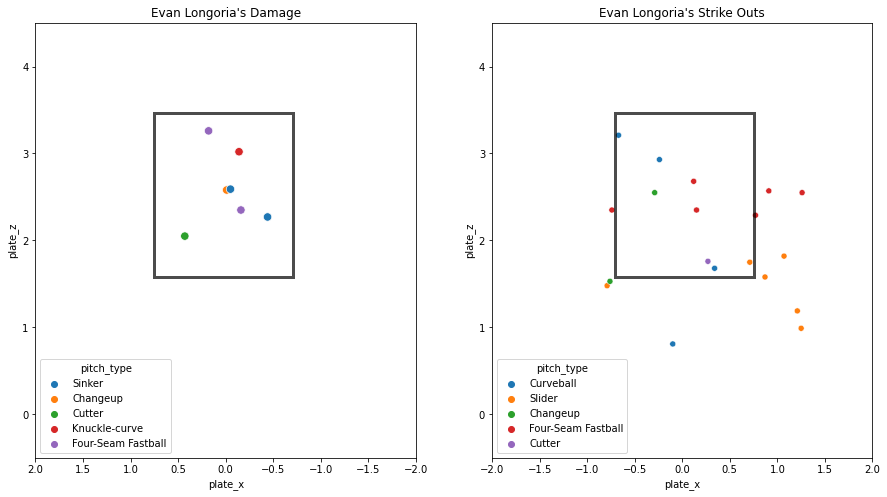

In [22]:
plot_batter_shots('Evan Lon')

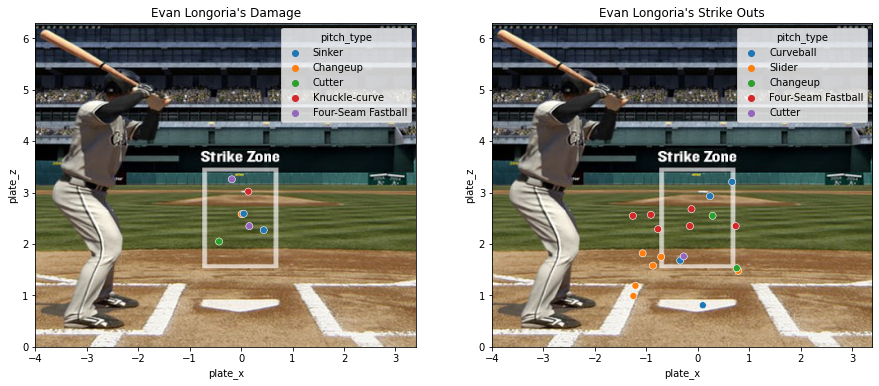

In [23]:
def plot_catcher_view(batter_name):
  img = plt.imread("/content/Baseball_plotting/Resources/image_1.jpg")
  damage_data = hit_data[hit_data['batter_name'].str.match(batter_name, na=False)]
  strikeout_data = strike_data[strike_data['batter_name'].str.match(batter_name, na=False)]
  batter = damage_data.iloc[0].batter_name

  if damage_data.batter_name.value_counts().count() > 1:
      return 'Found more than one player with this name'

  if damage_data.iloc[0].bats == 'R':
    damage_data['plate_x'] = damage_data['plate_x'] * -1
    strikeout_data['plate_x'] = strikeout_data['plate_x'] * -1
  

  plt.subplot(1, 2, 1)
  plt.gcf().set_size_inches(15, 8)
  plt.imshow(img, origin='upper',extent=(-4, 3.4, 0, 6.3))
  # ax.scatter(TMIN, PRCP, color="#ebb734")
  sns.scatterplot(data = damage_data, x = 'plate_x', y = 'plate_z', hue='pitch_type', s=50)
  plt.title(f"{batter}'s Damage")
  if damage_data.iloc[0].bats == 'L':
    plt.gca().invert_xaxis()


  # img = plt.imread("image_1.jpg")
  # fig, ax = plt.subplots(1,2)
  # plt.figure(2, figsize=(12, 10))
  plt.subplot(1, 2, 2)
  plt.gcf().set_size_inches(15, 8)
  plt.ylim((0, 6.3))
  plt.imshow(img, origin='upper',extent=(-4, 3.4, 0, 6.3))
  sns.scatterplot(data = strikeout_data, x = 'plate_x', y = 'plate_z', hue='pitch_type', s=50)
  plt.title(f"{batter}'s Strike Outs")
  if damage_data.iloc[0].bats == 'L':
    plt.gca().invert_xaxis()

  plt.show()

plot_catcher_view('Evan Lon')

In [24]:
def plot_pitcher_view(batter_name):
  # Preping data
  # plot_data['plate_x'] = plot_data['plate_x'] * -1
  # strike_data['plate_x'] = strike_data['plate_x'] * -1
  damage_data = hit_data[hit_data['batter_name'].str.match(batter_name, na=False)]
  strikeout_data = strike_data[strike_data['batter_name'].str.match(batter_name, na=False)]
  img = plt.imread('/content/Baseball_plotting/Resources/strike-zone-rh.jpg')
  batter = damage_data.iloc[0].batter_name

  if damage_data.batter_name.value_counts().count() > 1:
      return 'Found more than one player with this name'

  if damage_data.iloc[0].bats == 'R':
    damage_data['plate_x'] = damage_data['plate_x'] * -1
    strikeout_data['plate_x'] = strikeout_data['plate_x'] * -1

  # First plot
  plt.subplot(1, 2, 1)
  plt.gcf().set_size_inches(15, 8)
  plt.ylim((-1, 6.3))
  plt.imshow(img, origin='upper', extent=(-1.4, 4.6, -0.7, 6.3))
  sns.scatterplot(data = damage_data, x = 'plate_x', y = 'plate_z', hue='pitch_type', s=50);
  plt.title(f"{batter}'s Damage");
  if damage_data.iloc[0].bats == 'L':
    plt.gca().invert_xaxis()
  # plt.savefig('damage.png')

  # Second plot
  plt.subplot(1, 2, 2)
  plt.gcf().set_size_inches(15, 8)
  plt.ylim((-1, 6.3))
  plt.imshow(img, origin='upper', extent=(-1.4, 4.6, -0.7, 6.3))
  sns.scatterplot(data = strikeout_data, x = 'plate_x', y = 'plate_z', hue='pitch_type', s=50);
  plt.title(f"{batter}'s Strike Outs");
  if damage_data.iloc[0].bats == 'L':
    plt.gca().invert_xaxis()
  # plt.savefig('strikeout.png')
  plt.show()


# Seattle Mariners current active roster

##Go-To Starting Lineup vs RHP


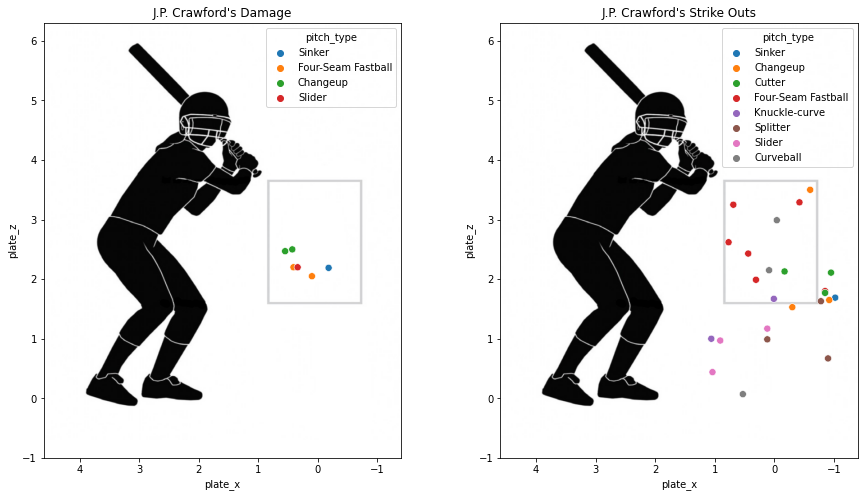

In [25]:
plot_pitcher_view('J.P. Crawford')

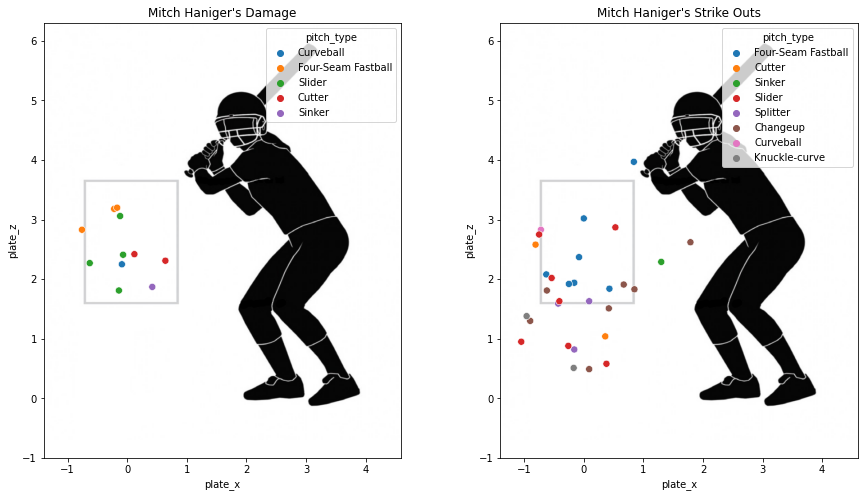

In [26]:
plot_pitcher_view('Mitch Haniger')

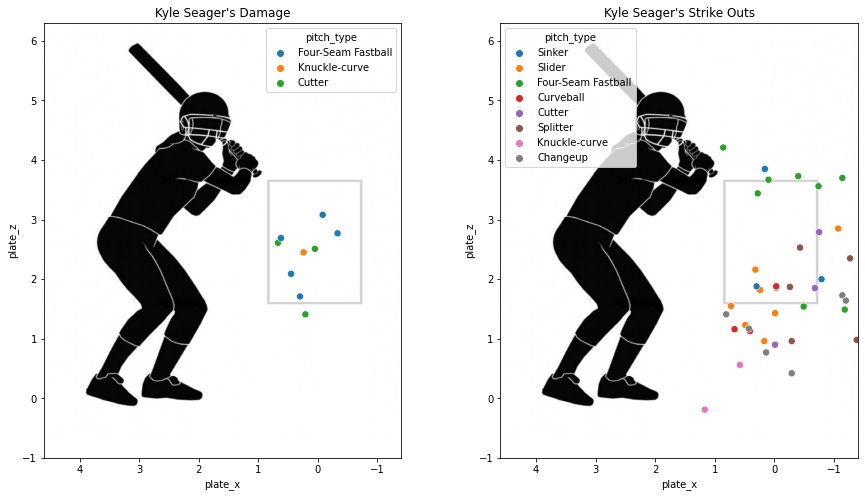

In [27]:
plot_pitcher_view('Kyle Seager')

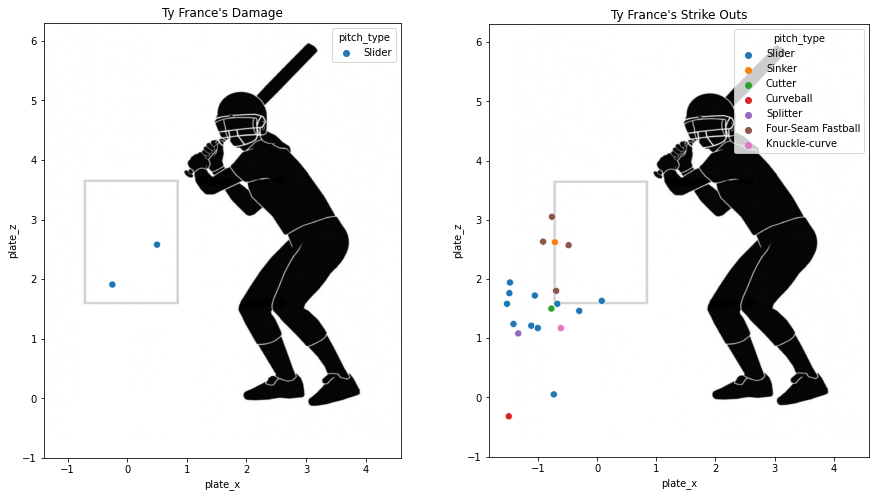

In [28]:
plot_pitcher_view('Ty France')

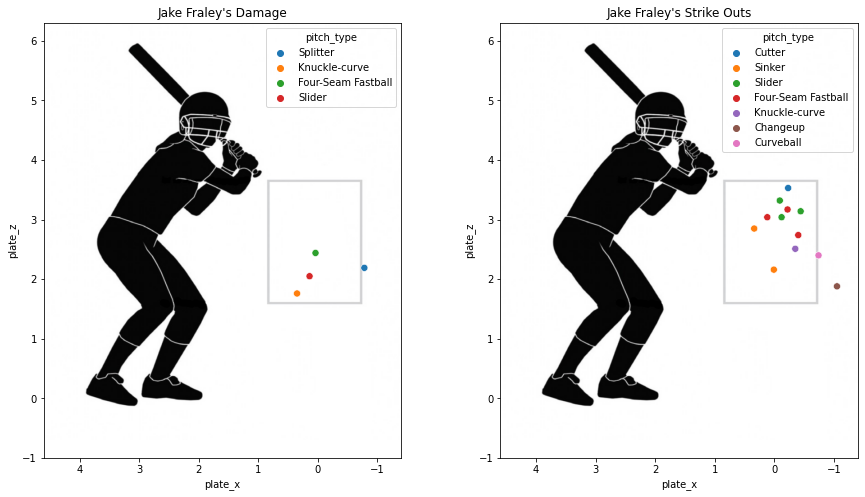

In [29]:
plot_pitcher_view('Jake Fraley')

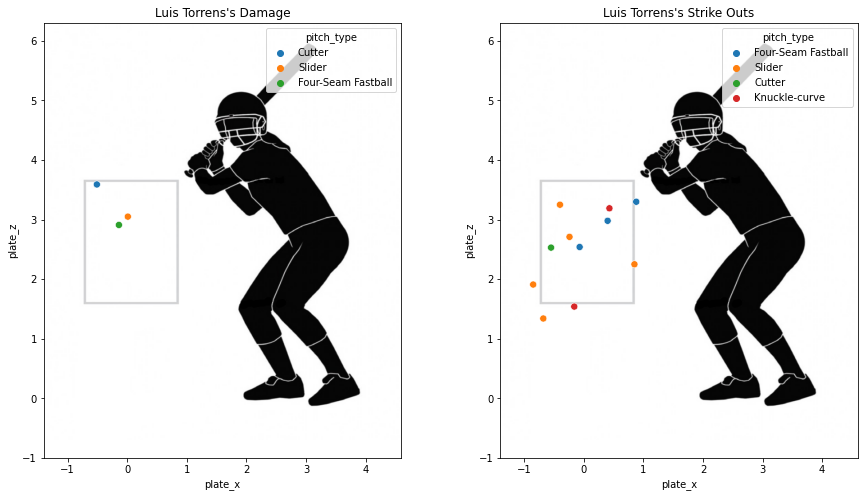

In [30]:
plot_pitcher_view('Luis Torrens')

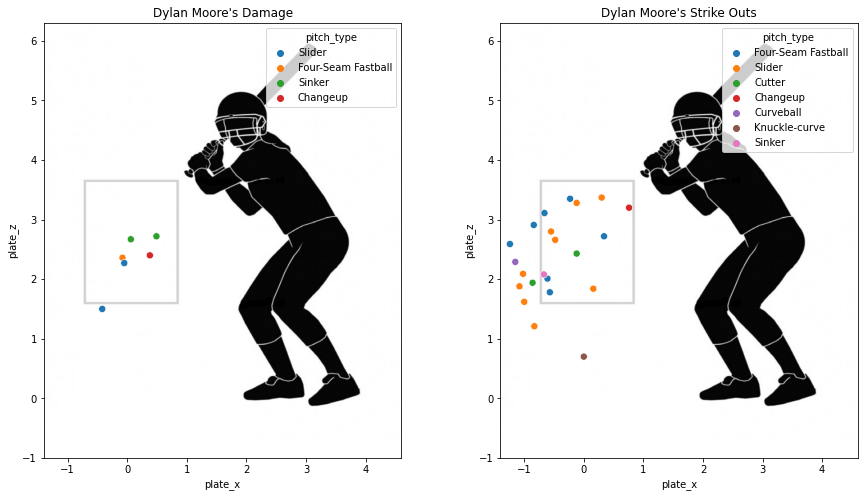

In [31]:
plot_pitcher_view('Dylan Moore')

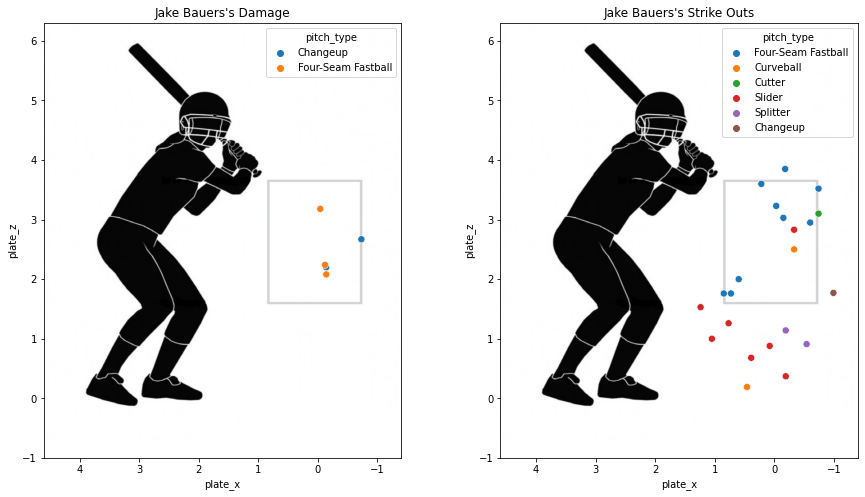

In [32]:
plot_pitcher_view('Jake Bauers')

##Bench

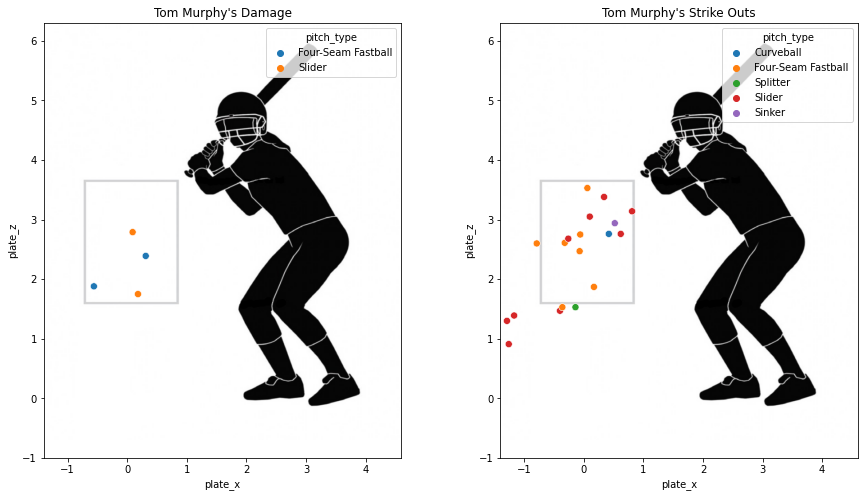

In [33]:
plot_pitcher_view('Tom Murphy')

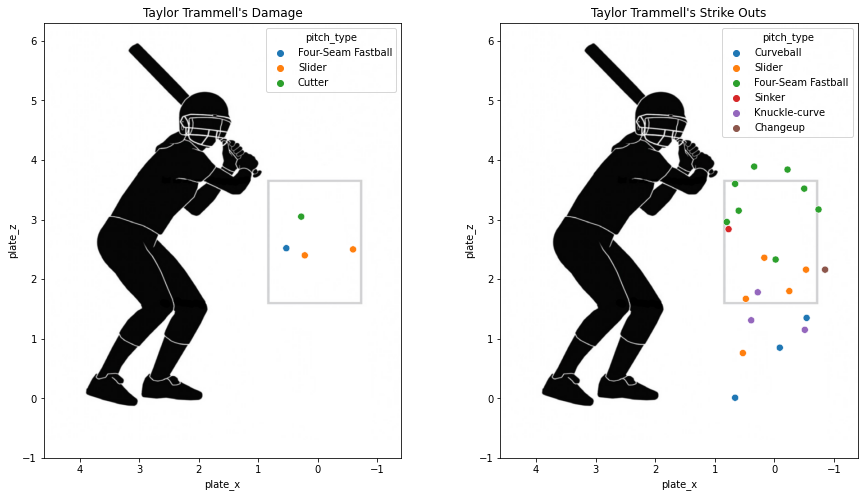

In [34]:
plot_pitcher_view('Taylor Trammell')